In [1]:
# Your work for Part 2 here!
# Remember to organize your work by including your own markdown cells!

# Creating a Machine Learning Model

In this notebook, we are creating a machine learning model to predict home prices based on the features we cleaned and created in the [EDA Notbook](./EDA.ipynb) created previously. 

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)

# Optional: widen display so lines don’t wrap
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Data Loading

In [4]:
df = pd.read_csv('../data/cleaned_ameshousing.csv')
# reads the cleaned csv file from previous EDA part. 

In [5]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Total Full Bath,Total Half Bath,Lot Shape_codes,Utilities_codes,Land Slope_codes,Overall Qual_codes,Overall Cond_codes,Exter Qual_codes,Exter Cond_codes,Bsmt Qual_codes,Bsmt Cond_codes,Bsmt Exposure_codes,BsmtFin Type 1_codes,BsmtFin Type 2_codes,Heating QC_codes,Electrical_codes,Kitchen Qual_codes,Functional_codes,Fireplace Qu_codes,Garage Finish_codes,Garage Qual_codes,Garage Cond_codes,Paved Drive_codes,Pool QC_codes,Fence_codes
0,1,526301100,20,RL,141.0,31770,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,No Pool,No Fence,No Misc Features,0,5,2010,WD,Normal,215000,2.0,0.0,2,3,0,5,4,2,2,3,4,4,4,1,1,3,2,7,4,3,3,3,1,0,0
1,2,526350040,20,RH,80.0,11622,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,No Masonry Veneer,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No Fireplace,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No Pool,MnPrv,No Misc Features,0,6,2010,WD,Normal,105000,1.0,0.0,3,3,0,4,5,2,2,3,3,1,3,2,2,3,2,7,0,1,3,3,2,0,3
2,3,526351010,20,RL,81.0,14267,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal,172000,1.0,1.0,2,3,0,5,5,2,2,3,3,1,5,1,2,3,3,7,0,1,3,3,2,0,0
3,4,526353030,20,RL,93.0,11160,Pave,No Alley Access,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,No Masonry Veneer,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,No Misc Features,0,4,2010,WD,Normal,244000,3.0,1.0,3,3,0,6,4,3,2,3,3,1,5,1,4,3,4,7,3,3,3,3,2,0,0
4,5,527105010,60,RL,74.0,13830,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,No Masonry Veneer,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No Pool,MnPrv,No Misc Features,0,3,2010,WD,Normal,189900,2.0,1.0,2,3,0,4,4,2,2,4,3,1,6,1,3,3,2,7,3,3,3,3,2,0,3


### View Correlations to the Target (Sale Price)

<Axes: >

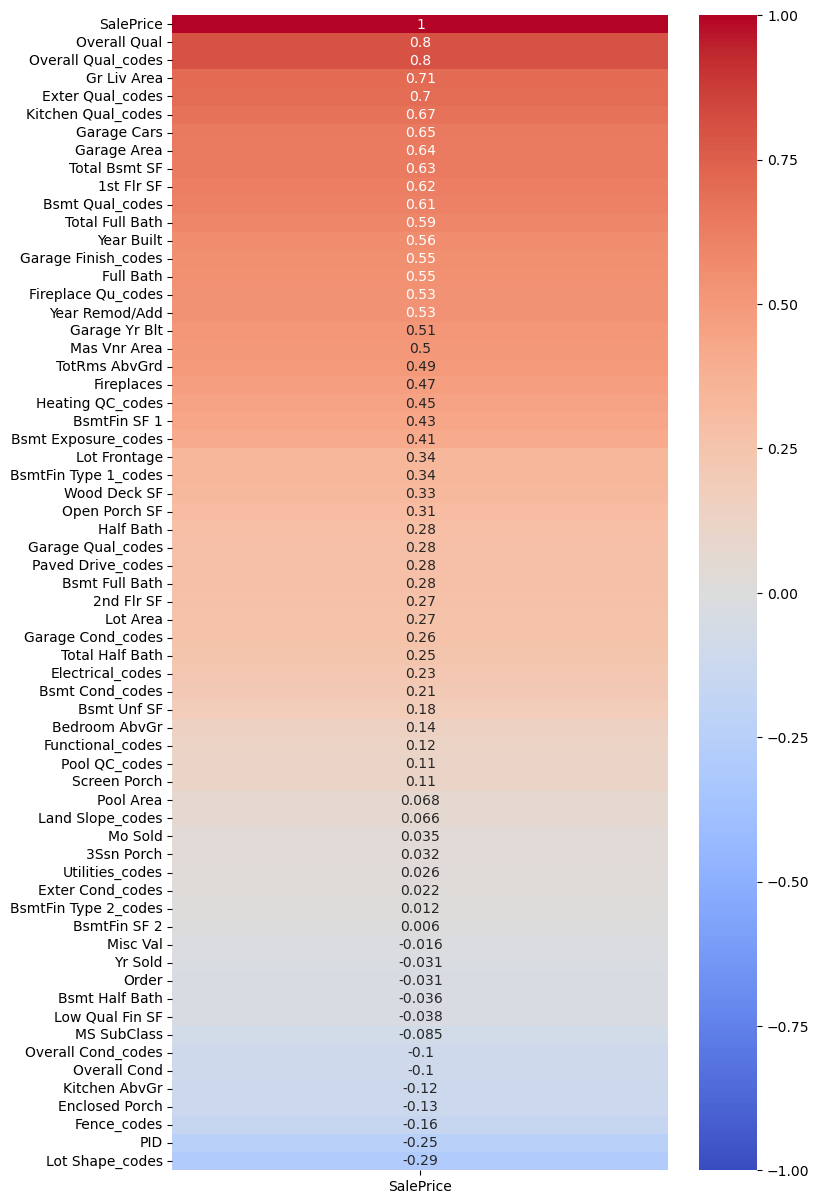

In [6]:

saleprice_corrs = df.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice', ascending=False)
plt.figure(figsize=(8, 15))
sns.heatmap(saleprice_corrs,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)

> Heatmap showing the correlation coefficents with all the numerical columns.

Converting the nominal columns to categorical columns for simplicity

In [7]:

nominal_columns = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition']
# list of the nominal columns for the dataset

In [8]:
df[nominal_columns] = df[nominal_columns].astype('category')
# converts the nominal columns to the category dtype 

In [9]:
df_dummy = df[['SalePrice'] + nominal_columns]
# makes a dataframe of sale price and the nominal columns

In [10]:
df_dummy = pd.get_dummies(df_dummy, columns=nominal_columns)
# creates dummy variables for all the nominal columns in df_dummy

In [11]:
df_dummy.shape
# outputs the shape of the df_dummy dataframe

(2926, 191)

<Axes: >

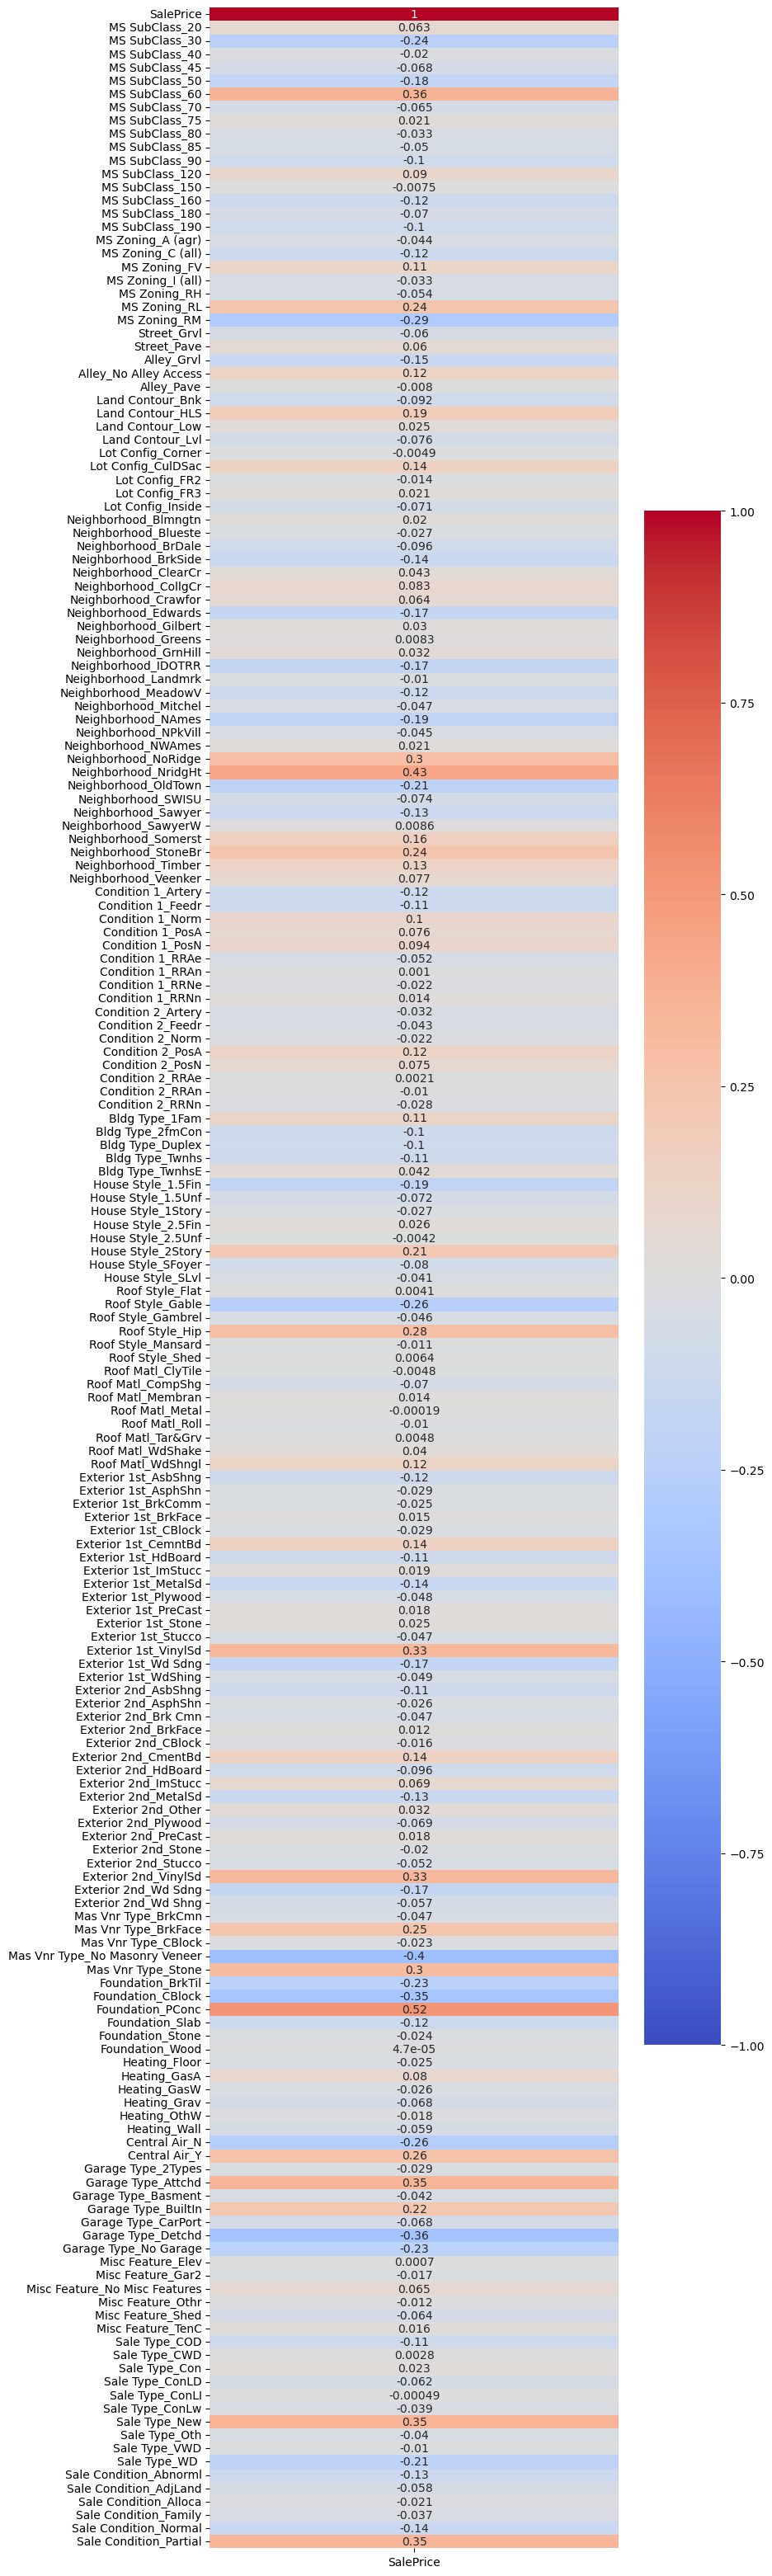

In [12]:
plt.figure(figsize=(8, 40))
sns.heatmap(df_dummy.corr()[['SalePrice']], 
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)
# makes a heatmap of correlations between each nominal column and the saleprice

## Feature Selections

In [13]:
# list(df.select_dtypes(include=np.number).columns)

In [14]:
features = ['Overall Qual_codes', 'Exter Qual_codes', 'Kitchen Qual_codes', 'Bsmt Qual_codes', \
           'Heating QC_codes', 'Garage Qual_codes', 'Gr Liv Area', \
           'Lot Shape_codes', 'Total Full Bath', 'Total Half Bath', \
           'TotRms AbvGrd', 'Garage Area', 'Overall Cond_codes', 'Misc Val', \
           'Total Bsmt SF', 'Bsmt Cond_codes', 'Garage Area', 'Garage Cond_codes', 'Lot Area']
# the list of features to use in the model
nominal_features = ['House Style', 'Bldg Type', 'Sale Condition', \
                    'Neighborhood', 'Misc Feature', 'Sale Type', 'Garage Type'] 
# list of nominal features to use in the model

In [15]:
len(features + nominal_features)

26

### Feature Reasoning

#### Normal Features
- **Overall Qual_codes, Exter Qual_codes, Kitchen Qual_codes, Bsmt Qual_codes, Heating QC_codes, Garage Qual_codes, Overall Cond_codes, Bsmt Cond_codes,  Garage Cond_codes**:
    - These are all columns relating to the overall quality and condition to the house (the exterior, the kitchen, the basement, etc.), so I used them since the directly relate to the state of the house.
- **Gr Liv Area**: This is the area of the above ground living area in square feet, and has a clear correlation from the above heatmap.
- **Lot Shape_codes**: this has to do with the shape of the lot, and we can see there is a low, but noticable, negative correlation to the sale price.
- **Total Full Bath and Total Half Bath**: This is the number of bathrooms (full and half) in the house, which does affect the price.
- **TotRms AbvGrd**: This is the total number of rooms above ground (ie, not the basement). The number of rooms would have an affect on the price.
- **Garage Area**: This is the size of the garage in square feet, which woul drive the prices up
- **Misc Val**: This is the value of the misc feature, if any. Feature is a nominal column.
- **Total Bsmt SF** - This is the total square footage of the basement


#### Nominal Features
- **House Style**: This describes things like if the house is a 1 story, 1.5 story, 2 story with with 2nd level finished or unfinished, etc. The number of stories in a house would logically be a factor in determining the price of the house
- **Bldg Type**: This column tells us the type of building, like if it is a single family, a duplex, a townhouse, all of which would have different prices.
- **Sale Condition/Sale Type**: This tells us the condition of sale, like if it is normal sale, an abnormal sale (foreclosure, trade, etc.), a sale between family. It also tells us the type of sale, like with warrenty or a contract, etc. This also affects the price.
- **Neighborhood**: This is the neighborhood the house is located in. Location can have a large affect on prices
- **Misc Feature**: This is a column that contains some miscellanous features some of the houses may have (like an elevator, a 2nd garage, a tennis court, etc). The value of this is in the Continuous features list
- **Garage Type** - this tells us the type of garage, like if it is attached, detached, builtin, or even if there is no garage. 


### Data Splitting

In [16]:
X = df[features+nominal_features]
# independant variables
y = df['SalePrice']
# target variable

In [17]:
X = pd.get_dummies(X, columns=nominal_features) 
# makes the duummy variables for the nomianl independent variables

In [18]:
# X.head()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# splits the dataset into training (75% of the data) and testing (25% of the data) sets. 

### Model Selections

#### Linear Regression

In [20]:
lr = LinearRegression()
# instantiates the linear regression model

In [21]:
lr.fit(X_train, y_train)
# trains the linear regression model on the training data and labels 

LinearRegression()

In [22]:
def get_scores(model, X_train, X_test, y_train, y_test):
    """
    Creator: Daniel Gallo
    Inputs:
        model: the trained machine learning model on the X_train and y_train created previously. 
        X_train: the features of the training set from train_test_split
        X_test: the feautres of the testing set from train_test_split
        y_train: the targets of the training set from train_test_split
        y_test: the targets of the testing set from train test split
    Outputs: Prints the r-squared score of the models predictions of the training set and testing set
    Creates a baseline RMSE score, as well as RMSE scores for training and testing set. 
    Outputs all the scores for comparison

    Notes:
    Model passed in MUST BE fit to the data prior. train_test_split must also occur BEFORE this method invocation. 
    """
    print(f"Training R-Squared Score:\t{model.score(X_train, y_train)}")
    print(f"Testing R-Squared Score:\t{model.score(X_test, y_test)}")
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    print(f"Training RMSE Score:\t\t{root_mean_squared_error(y_train, train_preds)}")
    print(f"Testing RMSE Score:\t\t{root_mean_squared_error(y_test, test_preds)}")
    test_mean = y_test.mean()
    baseline_preds = np.full_like(y_test, test_mean)
    print(f"Baseline RMSE Score:\t\t{root_mean_squared_error(y_test, baseline_preds)}")

In [23]:
get_scores(lr, X_train, X_test, y_train, y_test)
# gets the R2 and RMSE scores of the linear regression model 

Training R-Squared Score:	0.864546072690269
Testing R-Squared Score:	0.8657675099459803
Training RMSE Score:		29138.42689270523
Testing RMSE Score:		30019.08280843006
Baseline RMSE Score:		81934.83728199032


> We can see that the training score performs slightly worse than the testing score. However, they are both around 0.86, which means the model explain 86% of the variance in the price of the house. This is pretty good.
> The RMSE scores are also pretty close. This tells us that, on average, our predictions are around \$30,000 off from the actual price. This is better than the baseline of just predicting the average everytime, which is off by \\$81,000 on average

#### Ridge Regression

In [24]:

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
# list of different alphas for ridge regression for regularization
for a in alphas:
    ridge = Ridge(alpha=a)
    # instantiates the ridge model with the alpha
    ridge.fit(X_train, y_train)
    # trains the model 
    print(f"Alpha = {a}")
    print('=' * 20)
    get_scores(ridge, X_train, X_test, y_train, y_test)
    # output the scores. 
    print('=' * 20)

Alpha = 0.1
Training R-Squared Score:	0.8645412524046102
Testing R-Squared Score:	0.865788966629116
Training RMSE Score:		29138.94535051045
Testing RMSE Score:		30016.683479886608
Baseline RMSE Score:		81934.83728199032
Alpha = 1.0
Training R-Squared Score:	0.8642901227554984
Testing R-Squared Score:	0.8659562296753636
Training RMSE Score:		29165.943476530338
Testing RMSE Score:		29997.97321797112
Baseline RMSE Score:		81934.83728199032
Alpha = 10.0
Training R-Squared Score:	0.8613459784841281
Testing R-Squared Score:	0.8648740401348631
Training RMSE Score:		29480.614794810197
Testing RMSE Score:		30118.822673405815
Baseline RMSE Score:		81934.83728199032
Alpha = 100.0
Training R-Squared Score:	0.8466983998551685
Testing R-Squared Score:	0.852891325845386
Training RMSE Score:		30998.71169613559
Testing RMSE Score:		31425.90087003364
Baseline RMSE Score:		81934.83728199032
Alpha = 1000.0
Training R-Squared Score:	0.814553593304627
Testing R-Squared Score:	0.8247086150986989
Training RMS

#### Lasso Regression

In [25]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
for a in alphas:
    lasso = Lasso(alpha=a)
    # instantiates lasso regression model
    lasso.fit(X_train, y_train)
    # trains the model
    print(f"Alpha = {a}")
    print('=' * 20)
    get_scores(lasso, X_train, X_test, y_train, y_test)
    print('=' * 20)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.598e+11, tolerance: 1.375e+09
  model = cd_fast.enet_coordinate_descent(


Alpha = 0.1
Training R-Squared Score:	0.8645460398377904
Testing R-Squared Score:	0.8659785968515984
Training RMSE Score:		29138.43042626644
Testing RMSE Score:		29995.47031185074
Baseline RMSE Score:		81934.83728199032
Alpha = 1.0
Training R-Squared Score:	0.8645425639036063
Testing R-Squared Score:	0.8663050927834902
Training RMSE Score:		29138.80428988958
Testing RMSE Score:		29958.911334628658
Baseline RMSE Score:		81934.83728199032
Alpha = 10.0
Training R-Squared Score:	0.8643336514562822
Testing R-Squared Score:	0.8671331769990891
Training RMSE Score:		29161.265639254598
Testing RMSE Score:		29865.986942507854
Baseline RMSE Score:		81934.83728199032
Alpha = 100.0
Training R-Squared Score:	0.858138026117679
Testing R-Squared Score:	0.8643991452988322
Training RMSE Score:		29819.70207504544
Testing RMSE Score:		30171.701958526402
Baseline RMSE Score:		81934.83728199032
Alpha = 1000.0
Training R-Squared Score:	0.8216521997561356
Testing R-Squared Score:	0.8323084686050013
Training R

In [38]:
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coef': lr.coef_})
# coef_df - dataframe of different coefficents of features

In [41]:
coef_df =coef_df[coef_df['Feature'].isin(features)]
# filters out the nominal features, as there are many due to dummy vars. 

<Axes: xlabel='Coef', ylabel='Feature'>

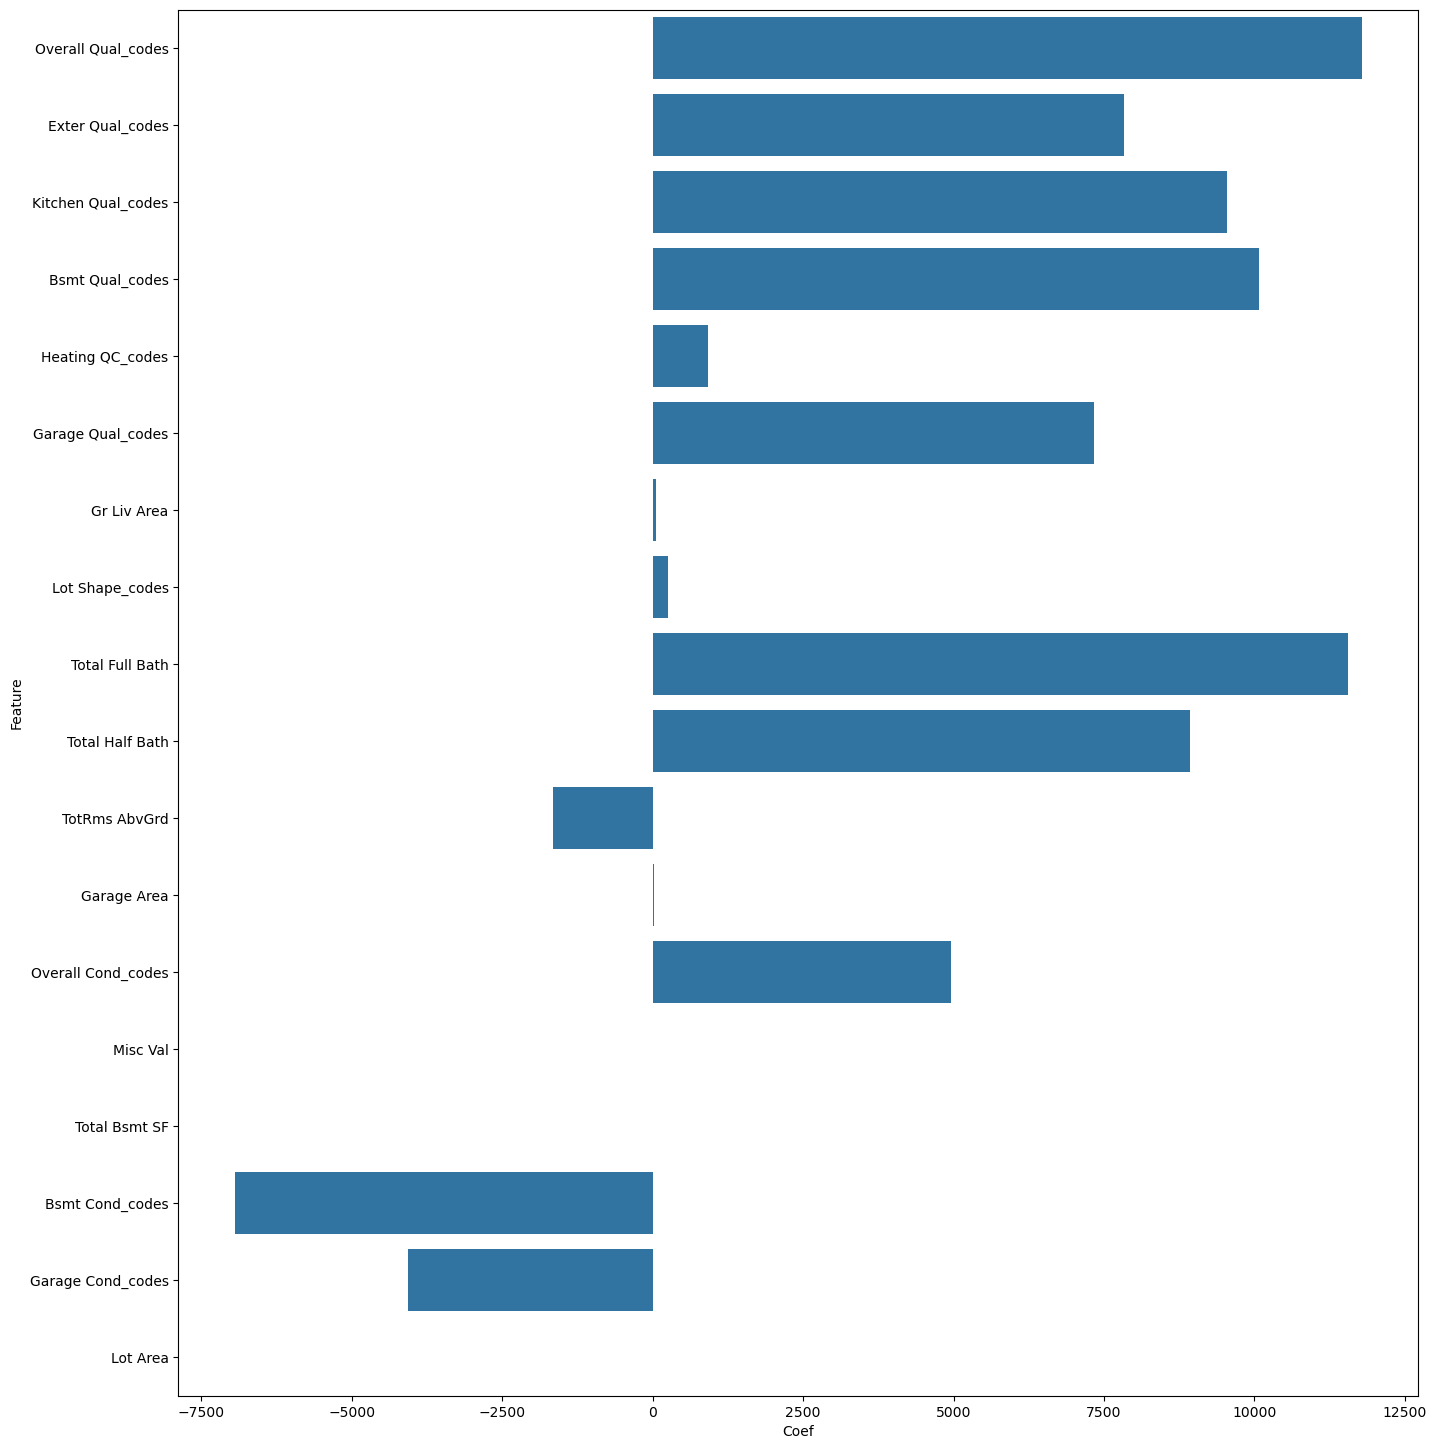

In [42]:
plt.figure(figsize=(16, 18))
sns.barplot(data=coef_df, x='Coef', y='Feature')
# makes a barplot of the different coefs to see how much each feature affects the model 

> This barplot shows us how much of an affect each of the numerical features has on the sale price, showing its _coef number. 

#### Other regression algorithims

In [29]:
rf = RandomForestRegressor()
# instantiates the random forest model
ls = LinearSVR(max_iter=20000)
# instantiates the linear support vector regression model
dtr = DecisionTreeRegressor()
# instantiates the decision tree regression model. 

In [30]:
models = {'Random Forest': rf, 'Linear SVR': ls, 'Decision Tree': dtr}
# dictionary of different models to loop through. 

In [31]:
for name, model in models.items():
    print(name)
    print("=" * 20)
    model.fit(X_train, y_train)
    # trains each model on the training set
    print()

Random Forest

Linear SVR

Decision Tree



C:\Users\danie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
for name, model in models.items():
    print(name)
    print("=" * 20)
    get_scores(model, X_train, X_test, y_train, y_test)
    # prints the scores ofr each model
    print()

Random Forest
Training R-Squared Score:	0.9826396184226794
Testing R-Squared Score:	0.9196112205206173
Training RMSE Score:		10431.576187367928
Testing RMSE Score:		23230.914853706614
Baseline RMSE Score:		81934.83728199032

Linear SVR
Training R-Squared Score:	0.6744250771395193
Testing R-Squared Score:	0.6927627462581154
Training RMSE Score:		45174.75169650282
Testing RMSE Score:		45415.64984410663
Baseline RMSE Score:		81934.83728199032

Decision Tree
Training R-Squared Score:	0.9999653255720204
Testing R-Squared Score:	0.8228306099485264
Training RMSE Score:		466.20288165254453
Testing RMSE Score:		34487.59744317586
Baseline RMSE Score:		81934.83728199032



In [33]:
df.describe()

,Order,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Total Full Bath,Total Half Bath,Lot Shape_codes,Utilities_codes,Land Slope_codes,Overall Qual_codes,Overall Cond_codes,Exter Qual_codes,Exter Cond_codes,Bsmt Qual_codes,Bsmt Cond_codes,Bsmt Exposure_codes,BsmtFin Type 1_codes,BsmtFin Type 2_codes,Heating QC_codes,Electrical_codes,Kitchen Qual_codes,Functional_codes,Fireplace Qu_codes,Garage Finish_codes,Garage Qual_codes,Garage Cond_codes,Paved Drive_codes,Pool QC_codes,Fence_codes
count,2926.000000,2.926000e+03,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000
mean,1465.228982,7.141979e+08,68.996241,10137.275803,6.096719,5.562201,1971.373889,1984.261449,101.235133,442.896104,49.773411,559.598428,1052.267943,1158.951470,335.393028,4.683185,1499.027683,0.431647,0.061176,1.565960,0.379357,2.853725,1.044429,6.442242,0.599453,1978.109023,1.766917,472.858852,93.786398,47.471292,22.970608,2.596036,16.023923,2.246411,50.704375,6.218045,2007.790499,180810.098086,1.997608,0.440533,2.597744,2.998633,0.053657,5.096719,4.562201,2.399180,2.085441,3.480861,2.924812,1.630895,3.551606,1.276145,3.150034,2.894053,2.510595,6.843814,1.771360,1.720437,2.802461,2.810321,1.831169,0.012303,0.578264
std,846.414616,1.887218e+08,21.307396,7855.475165,1.411022,1.111583,30.241540,20.857785,178.717494,455.673203,169.247708,439.561828,440.224015,388.937201,428.440871,46.341841,503.867402,0.524878,0.245332,0.552468,0.502613,0.827186,0.214216,1.571078,0.647562,24.464970,0.760800,215.104881,126.415402,67.245246,64.083454,25.158333,56.122584,35.621416,566.728302,2.715255,1.317415,79893.750054,0.753563,0.546364,0.570364,0.045270,0.248466,1.411022,1.111583,0.580527,0.371939,0.900224,0.567935,1.075503,2.114477,0.957003,0.958120,0.382147,0.662854,0.663485,1.804841,0.898112,0.713202,0.709816,0.536719,0.197035,1.215509
min,1.000000,5.263011e+08,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,732.250000,5.284770e+08,60.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,1.000000,0.000000,2.000000,3.000000,0.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.00000

In [34]:
y_pred = lr.predict(X_test)
# gets the predictions for the testing set for linear regression

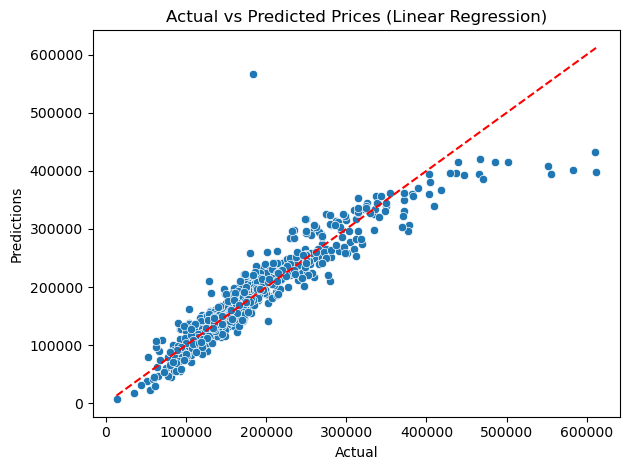

In [35]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.savefig("../images/act_vs_pred_lr.png")
# outputs the actual vs predicted pricesv of the testing set for linear regression

In [36]:
y_pred = rf.predict(X_test)
# gets the predictions for the testing set for random forest regression

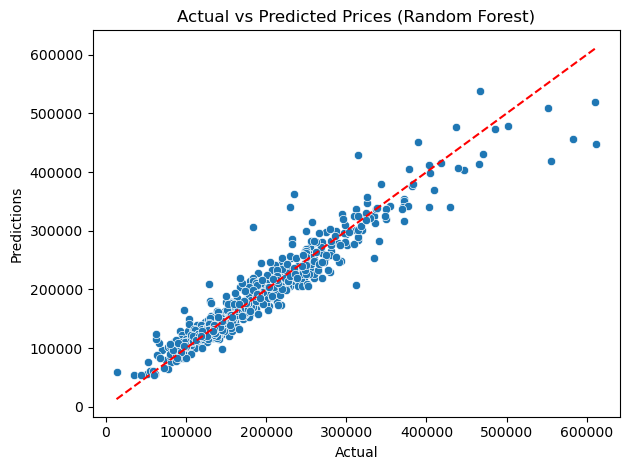

In [37]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.savefig("../images/act_vs_pred_rf.png")